In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("rolling_stones_spotify.csv")

In [5]:
#basic info about the dataset
print("Initial Data Overview:")
print(df.info())
print("\nFirst 5 Rows:")
print(df.head())

Initial Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1610 non-null   int64  
 1   name              1610 non-null   object 
 2   album             1610 non-null   object 
 3   release_date      1610 non-null   object 
 4   track_number      1610 non-null   int64  
 5   id                1610 non-null   object 
 6   uri               1610 non-null   object 
 7   acousticness      1610 non-null   float64
 8   danceability      1610 non-null   float64
 9   energy            1610 non-null   float64
 10  instrumentalness  1610 non-null   float64
 11  liveness          1610 non-null   float64
 12  loudness          1610 non-null   float64
 13  speechiness       1610 non-null   float64
 14  tempo             1610 non-null   float64
 15  valence           1610 non-null   float64
 16  popularity        1

In [9]:
#missing values 
print("\nMissing Values:")
print(df.insunll().sum())


Missing Values:


AttributeError: 'DataFrame' object has no attribute 'insunll'

In [11]:
#check for duplicates
print("\nDuplicate Entries:", df.duplicated().sum())
df.drop_duplicates(inplace=True)


Duplicate Entries: 0


In [13]:
#to datetime format
df["release_date"] = pd.to_datetime(df["release_date"], errors="coerce")

In [19]:
#remove outliers using IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 - 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)] 

numerical_features = ["acousticness", "danceability", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "tempo", "valence", "popularity", "duration_ms"]

AttributeError: module 'matplotlib.pyplot' has no attribute 'tigth_layout'

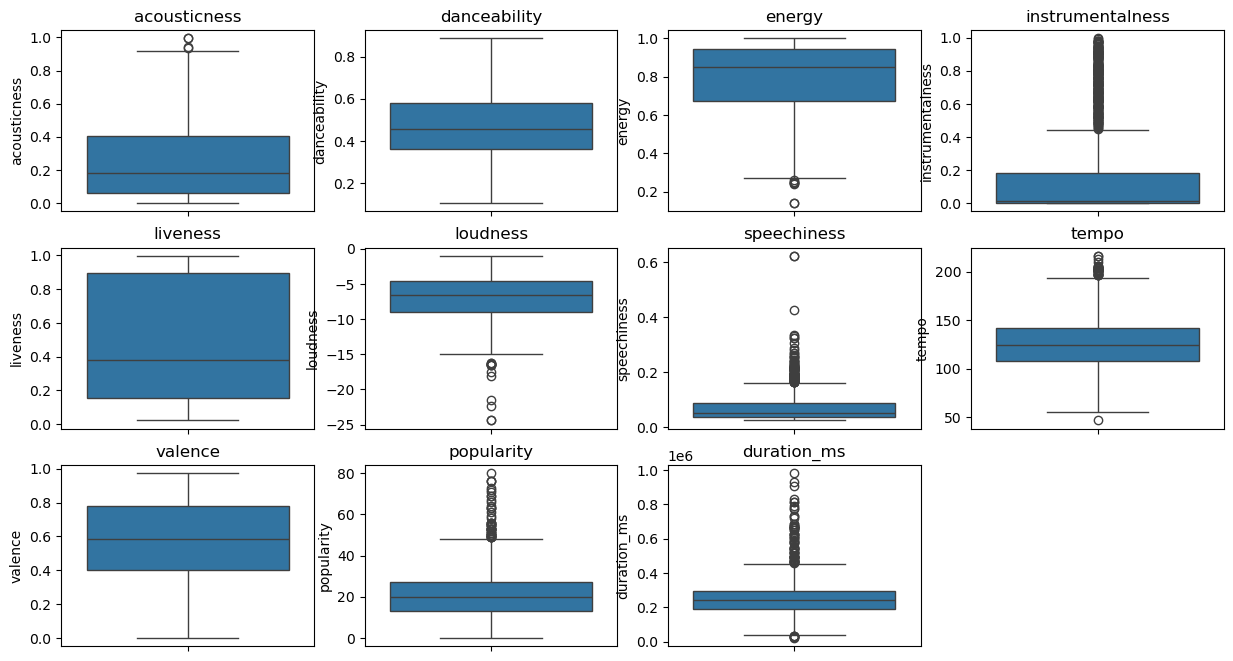

In [21]:
#visualizing outliers
plt.figure(figsize=(15, 8))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y=df[feature])
    plt.title(feature)
plt.tigth_layout()
plt.show()

for feature in numerical_features:
    df = remove_outliers(df, feature)

In [27]:
#cleaned dataset info 
print("\nData after Cleaning:")
print(df.info())


Data after Cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Unnamed: 0        1610 non-null   int64         
 1   name              1610 non-null   object        
 2   album             1610 non-null   object        
 3   release_date      1610 non-null   datetime64[ns]
 4   track_number      1610 non-null   int64         
 5   id                1610 non-null   object        
 6   uri               1610 non-null   object        
 7   acousticness      1610 non-null   float64       
 8   danceability      1610 non-null   float64       
 9   energy            1610 non-null   float64       
 10  instrumentalness  1610 non-null   float64       
 11  liveness          1610 non-null   float64       
 12  loudness          1610 non-null   float64       
 13  speechiness       1610 non-null   float64       
 14  te

In [29]:
#Refine the data for further processing based normalize numerical features
df[numerical_features] = (df[numerical_features] - df[numerical_features].min()) / (df[numerical_features].max() - df[numerical_features].min())


Top 2 Recommended Albums:
album
Sticky Fingers (Remastered)    0.66625
Some Girls                     0.60125
Name: popularity, dtype: float64


C:\Users\Admin\AppData\Local\Temp\ipykernel_9644\2590610420.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_albums.index, y=top_albums.values, palette="coolwarm")


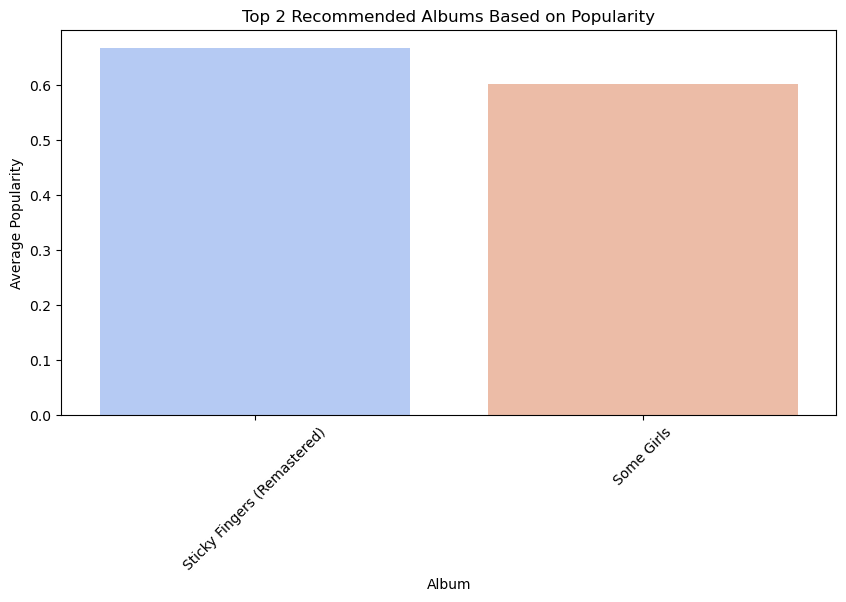

In [31]:
#identify top 2 albums with the highest number of popular songs
top_albums = df.groupby("album")["popularity"].mean().sort_values(ascending=False).head(2)
print("\nTop 2 Recommended Albums:")
print(top_albums)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_albums.index, y=top_albums.values, palette="coolwarm")
plt.title("Top 2 Recommended Albums Based on Popularity")
plt.xlabel("Album")
plt.ylabel("Average Popularity")
plt.xticks(rotation=45)
plt.show()

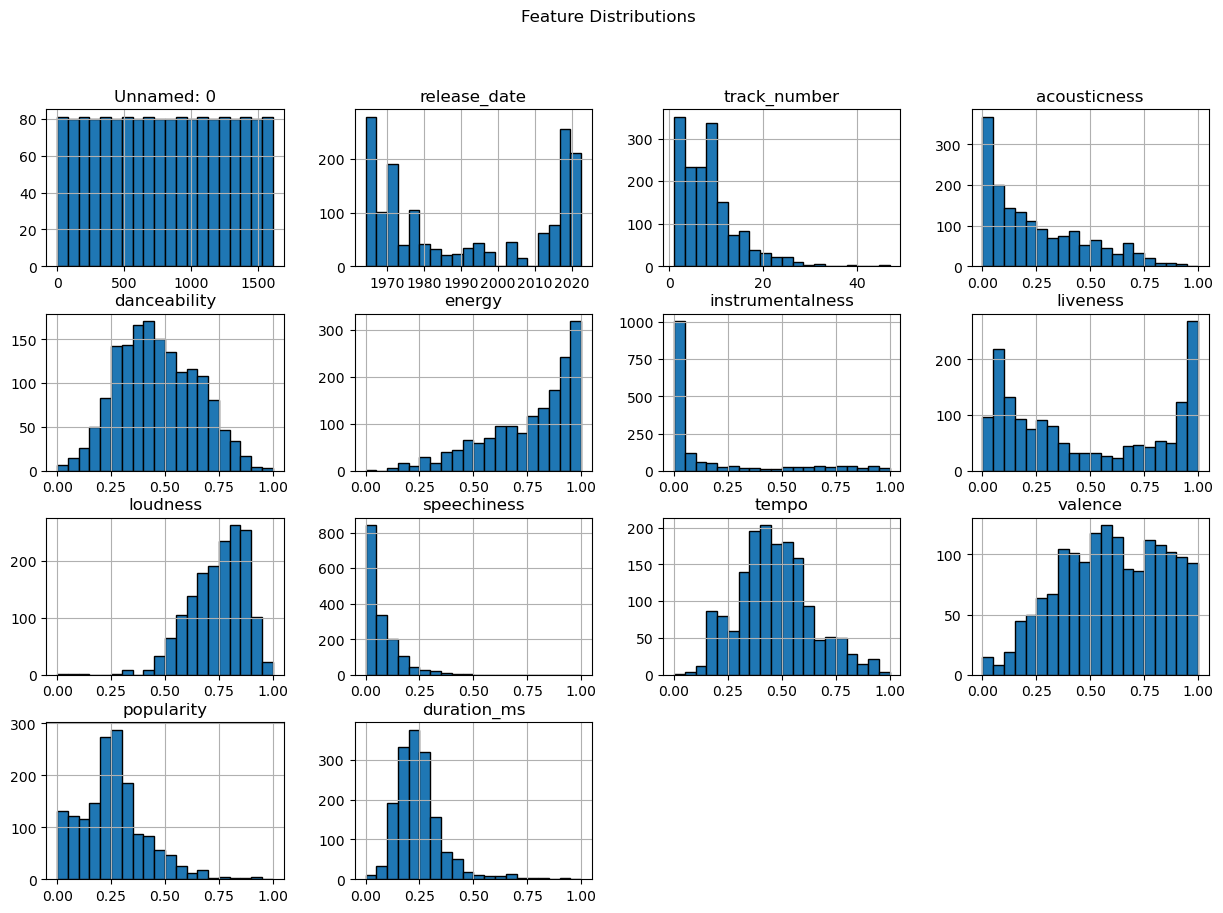

In [33]:
#exploring song features
df.hist(figsize=(15, 10), bins=20, edgecolor="black")
plt.suptitle("Feature Distributions")
plt.show()

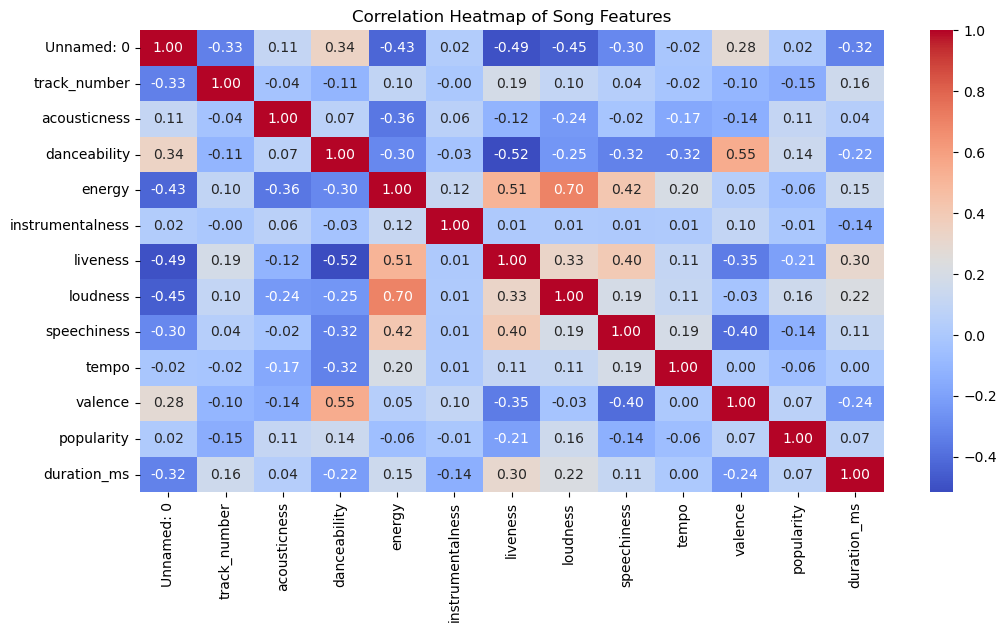

In [37]:
# Selecting only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=['number'])

# Analyzing correlation between popularity and other features
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Song Features")
plt.show()


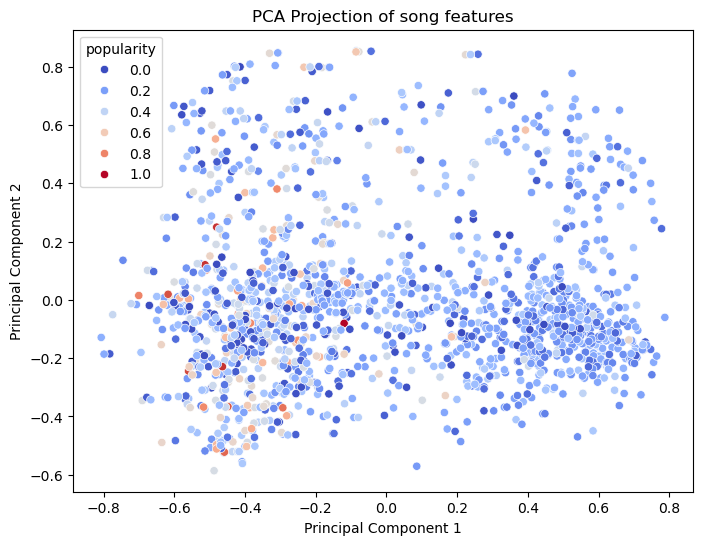

Dimensionality reduction using PCA helps visualize complex feature relationships and enhances clustering models.


In [45]:
#dimensionality reduction insigths
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
pca_result = pca.fit_transform(df[numerical_features])
df["PCA1"] = pca_result[:, 0]
df["PCA2"] = pca_result[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["PCA1"], y=df["PCA2"], hue=df["popularity"], palette="coolwarm")
plt.title("PCA Projection of song features")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

print("Dimensionality reduction using PCA helps visualize complex feature relationships and enhances clustering models.")

In [49]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist

C:\Users\Admin\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Admin\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\Admin\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Admin\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\Admin\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

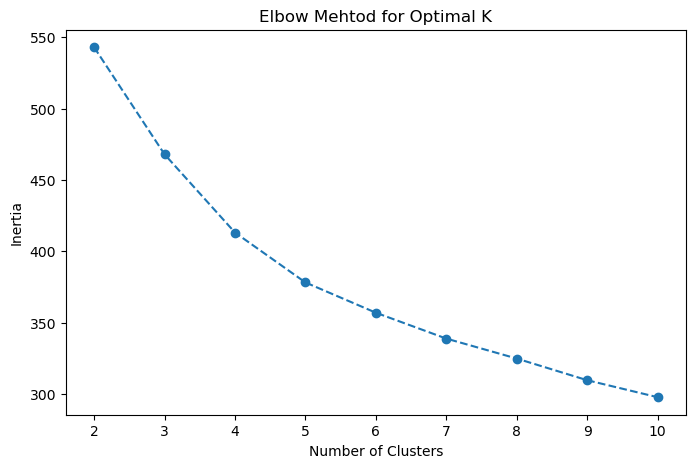

In [51]:
#finding the optimal number of cluster using the elbow mehtod
inertia = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df[numerical_features])
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker="o", linestyle="--")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Mehtod for Optimal K")
plt.show()

In [53]:
#applying k-means clustering with optimal clusters 
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(df[numerical_features])

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


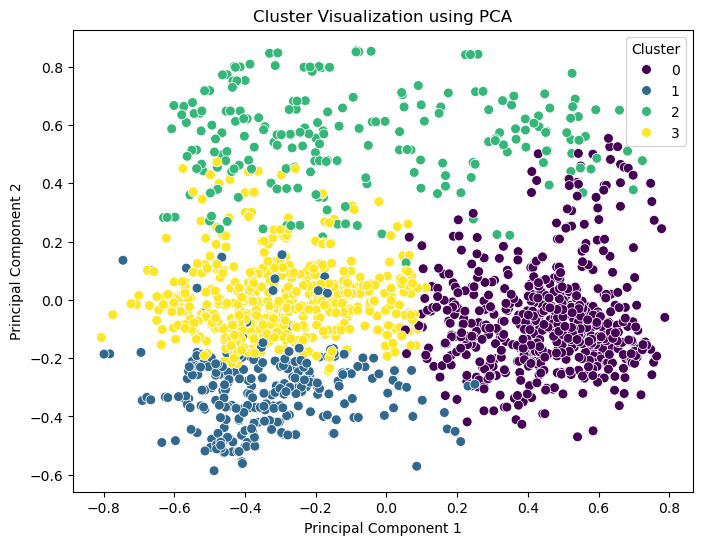

In [55]:
#visualizing clusters in PCA space
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['Cluster'], palette='viridis', s=50)
plt.title("Cluster Visualization using PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [57]:
#deining clusters based on feature ananlysis
cluster_means = df.groupby("Cluster")[numerical_features].mean()
print("\nCluster Definitions based on Feature Averages:")
print(cluster_means)


Cluster Definitions based on Feature Averages:
         acousticness  danceability    energy  instrumentalness  liveness  \
Cluster                                                                     
0            0.209932      0.349823  0.885067          0.089449  0.879168   
1            0.488159      0.495954  0.460518          0.053159  0.212026   
2            0.279857      0.493881  0.796954          0.761254  0.421157   
3            0.164542      0.568560  0.757910          0.058156  0.201835   

         loudness  speechiness     tempo   valence  popularity  duration_ms  
Cluster                                                                      
0        0.800078     0.122790  0.495389  0.486731    0.218463     0.299985  
1        0.639665     0.039054  0.406064  0.429488    0.303148     0.244082  
2        0.744909     0.062530  0.457992  0.700263    0.264261     0.195077  
3        0.739272     0.051851  0.475576  0.766383    0.281760     0.209075  
